In [ ]:
import pandas as pd

data1 = pd.read_csv('/content/Best Bowling Economy Per Innings All Seasons Combine.csv')
data2 = pd.read_csv('/content/Fastest Centuries All Seasons Combine.csv')
data3 = pd.read_csv('/content/Fastest Fifties All Seasons Combine.csv')
data4 = pd.read_csv('/content/Most Dot Balls Per Innings All Seasons Combine.csv')
data5 = pd.read_csv('/content/Most Fours Per Innings All Seasons Combine.csv')
data6 = pd.read_csv('/content/Most Runs All Seasons Combine.csv')
data7 = pd.read_csv('/content/Most Sixes Per Innings All Seasons Combine.csv')
data8 = pd.read_csv('/content/Most Wickets All Seasons Combine.csv')


combined_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)
combined_data = combined_data.fillna(0)



print(combined_data)


       Unnamed: 0             Player   Ov  Runs  Wkts  Dots   Econ    SR  \
0               0    Mohammad Hafeez  4.0     8   1.0  14.0   2.00  24.0   
1               1      Ishant Sharma  4.0     9   2.0  14.0   2.25  12.0   
2               2          Brett Lee  4.0     9   1.0  17.0   2.25  24.0   
3               3      Shaun Pollock  4.0     9   1.0  17.0   2.25  24.0   
4               4   Dominic Thornely  3.0     7   2.0  12.0   2.33   9.0   
...           ...                ...  ...   ...   ...   ...    ...   ...   
13324        1523         Ben Stokes  1.0    12   0.0   0.0  12.00   0.0   
13325        1524    Dhawal Kulkarni  4.0    48   0.0   0.0  12.00   0.0   
13326        1525      Shreyas Gopal  7.0    84   0.0   0.0  12.00   0.0   
13327        1526  Kamlesh Nagarkoti  2.0    25   0.0   0.0  12.50   0.0   
13328        1527      Navdeep Saini  4.0    52   0.0   0.0  13.00   0.0   

      Against                   Venue  ...  Mat  Inns   NO  HS  Avg  100   50  \
0     

In [ ]:
player_name = "Virat Kohli"
player_data = combined_data[combined_data['Player'] == player_name]

centuries = len(player_data[player_data['Runs'] >= 100])
fifties = len(player_data[player_data['Runs'] >= 50])

print(f"{player_name} has scored {centuries} centuries and {fifties} fifties.")


Virat Kohli has scored 34 centuries and 142 fifties.


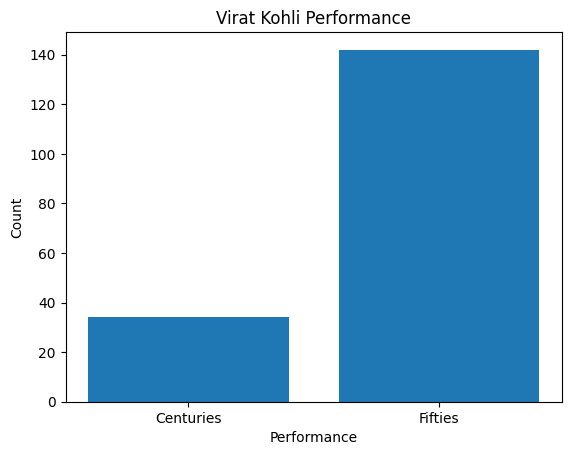

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['Centuries', 'Fifties'], [centuries, fifties])
plt.xlabel('Performance')
plt.ylabel('Count')
plt.title(f'{player_name} Performance')
plt.show()


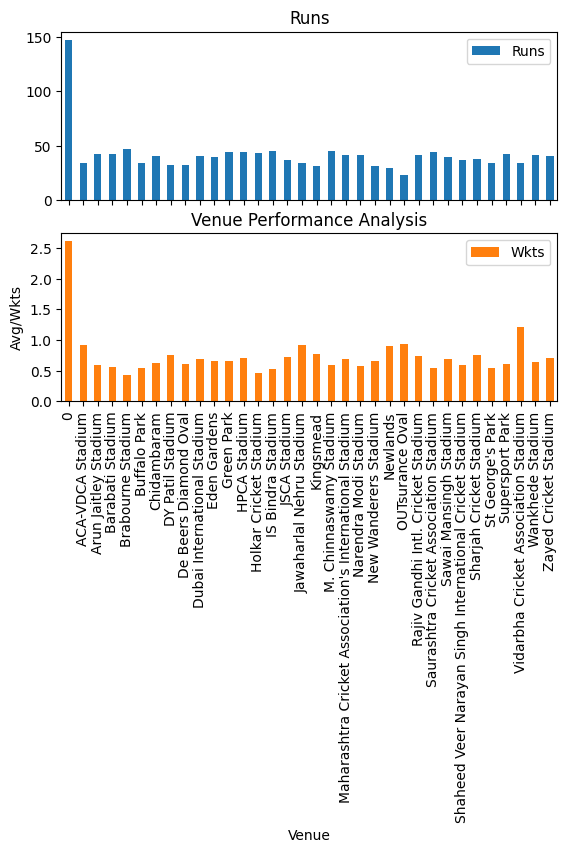

In [ ]:
venue_stats = combined_data.groupby('Venue')[['Runs', 'Wkts']].mean()

venue_stats.plot(kind='bar', subplots=True)
plt.xlabel('Venue')
plt.ylabel('Avg/Wkts')
plt.title('Venue Performance Analysis')
plt.show()


Mean Absolute Error: 16.322922589515663
Mean Squared Error: 869.1896466124341
R-squared (R2) Score: 0.9768445185803166
Coefficients (Slope): [0.79723094 2.12768562 5.2145364 ]
Intercept: 8.159399069757285
Cross-Validation Scores: [0.80206842 0.99201998 0.94000714]
Mean CV Score: 0.9113651778368027


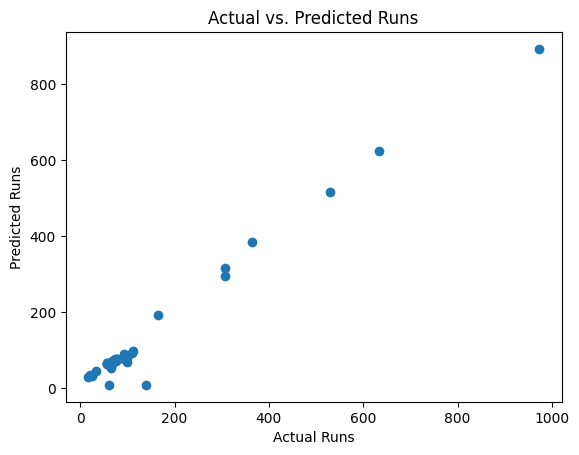

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

X = player_data[['BF', '4s', '6s']].values
y = player_data['Runs'].values

imputer = SimpleImputer(strategy='mean') # Creating a SimpleImputer object with the strategy of replacing missing values with the mean
X = imputer.fit_transform(X) # Transforming the dataset by replacing missing values with the mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Assuming 'X_train' and 'y_train' are training data and labels, respectively

model = LinearRegression() # Creating a LinearRegression model
model.fit(X_train, y_train) # Training the model on the training data

y_pred = model.predict(X_test) # Making predictions on the test data

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}") # Calculating Mean Absolute Error (MAE)
print(f"Mean Squared Error: {mse}") # Calculating Mean Squared Error (MSE)
print(f"R-squared (R2) Score: {r2}") # Calculating R-squared (R2)

print("Coefficients (Slope):", model.coef_)
print("Intercept:", model.intercept_)

if X.shape[0] >= 2:
    cv_scores = cross_val_score(model, X, y, cv=3) # Cross-validation is a technique used to assess how well a model generalizes to new, unseen data by splitting the dataset into multiple subsets (folds) for training and testing.
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
else:
    print("Insufficient data for cross-validation.")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs')
plt.show()


In [ ]:
import pandas as pd

player1 = input("Enter the name of the first player: ")
player2 = input("Enter the name of the second player: ")

player1_data = combined_data[combined_data['Player'] == player1]
player2_data = combined_data[combined_data['Player'] == player2]

if player1_data.empty or player2_data.empty:
    print("Data not available for one or both players.")
else:
    comparison_data = pd.concat([player1_data, player2_data], axis=0) #combine data from two DataFrames with the same columns but different rows.

    print(comparison_data)


Enter the name of the first player: MS Dhoni
Enter the name of the second player: Virat Kohli
       Unnamed: 0       Player    Ov  Runs  Wkts  Dots   Econ    SR Against  \
2172            6     MS Dhoni   0.0    65   0.0   0.0   0.00   0.0     RCB   
2231           65     MS Dhoni   0.0    60   0.0   0.0   0.00   0.0    PBKS   
2261           95     MS Dhoni   0.0    56   0.0   0.0   0.00   0.0    PBKS   
2278          112     MS Dhoni   0.0    58   0.0   0.0   0.00   0.0     DEC   
2331          165     MS Dhoni   0.0    66   0.0   0.0   0.00   0.0     KKR   
...           ...          ...   ...   ...   ...   ...    ...   ...     ...   
12103         302  Virat Kohli   5.2    50   0.0   0.0   9.37   0.0       0   
12199         398  Virat Kohli  17.0   139   2.0   0.0   8.17  51.0       0   
12376         575  Virat Kohli   3.0    49   0.0   0.0  16.33   0.0       0   
12695         894  Virat Kohli   1.5    10   0.0   0.0   5.45   0.0       0   
12812        1011  Virat Kohli   1.0 

Data Overview:
   Unnamed: 0            Player   Ov  Runs  Wkts  Dots  Econ    SR Against  \
0           0   Mohammad Hafeez  4.0     8   1.0  14.0  2.00  24.0     DEC   
1           1     Ishant Sharma  4.0     9   2.0  14.0  2.25  12.0     RCB   
2           2         Brett Lee  4.0     9   1.0  17.0  2.25  24.0      MI   
3           3     Shaun Pollock  4.0     9   1.0  17.0  2.25  24.0     CSK   
4           4  Dominic Thornely  3.0     7   2.0  12.0  2.33   9.0     KKR   

                    Venue  ... Mat  Inns  NO   HS  Avg  100  50  BBI  4w  5w  
0            Eden Gardens  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
1  M. Chinnaswamy Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
2       IS Bindra Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
3        Wankhede Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
4        Wankhede Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  

[5 rows x 25 columns]
Data Statistics:
  

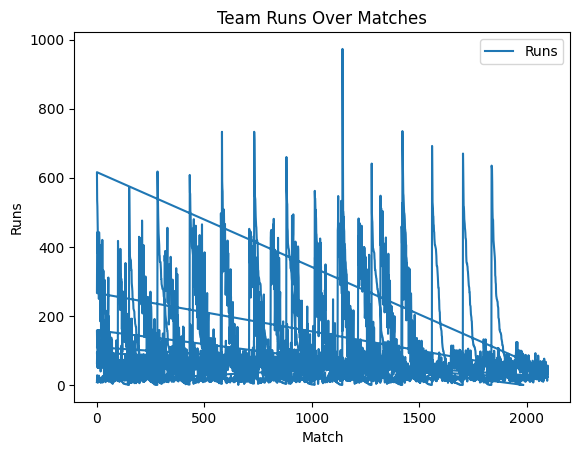

Average Runs: 68.85970440393127
Average Runs for the Opponent Team: nan
Average runs are equal between your team and the opponent.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


print("Data Overview:")
print(combined_data.head())
print("Data Statistics:")
print(combined_data.describe())

combined_data.plot(x='Unnamed: 0', y='Runs', kind='line')  # Modify 'Score' to 'Runs'
plt.xlabel('Match')
plt.ylabel('Runs')
plt.title('Team Runs Over Matches')
plt.show()

average_runs = combined_data['Runs'].mean()
print(f"Average Runs: {average_runs}")


opponent_data = combined_data[combined_data['Against'] == 'Opponent']
average_opponent_runs = opponent_data['Runs'].mean()
print(f"Average Runs for the Opponent Team: {average_opponent_runs}")

if average_runs > average_opponent_runs:
    print("Your team has a higher average runs than the opponent.")
elif average_runs < average_opponent_runs:
    print("Your team has a lower average runs than the opponent.")
else:
    print("Average runs are equal between your team and the opponent.")

Data Overview:
   Unnamed: 0            Player   Ov  Runs  Wkts  Dots  Econ    SR Against  \
0           0   Mohammad Hafeez  4.0     8   1.0  14.0  2.00  24.0     DEC   
1           1     Ishant Sharma  4.0     9   2.0  14.0  2.25  12.0     RCB   
2           2         Brett Lee  4.0     9   1.0  17.0  2.25  24.0      MI   
3           3     Shaun Pollock  4.0     9   1.0  17.0  2.25  24.0     CSK   
4           4  Dominic Thornely  3.0     7   2.0  12.0  2.33   9.0     KKR   

                    Venue  ... Mat  Inns  NO   HS  Avg  100  50  BBI  4w  5w  
0            Eden Gardens  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
1  M. Chinnaswamy Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
2       IS Bindra Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
3        Wankhede Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  
4        Wankhede Stadium  ... NaN   NaN NaN  NaN  NaN  NaN NaN  NaN NaN NaN  

[5 rows x 25 columns]
Bowling Economy Sta

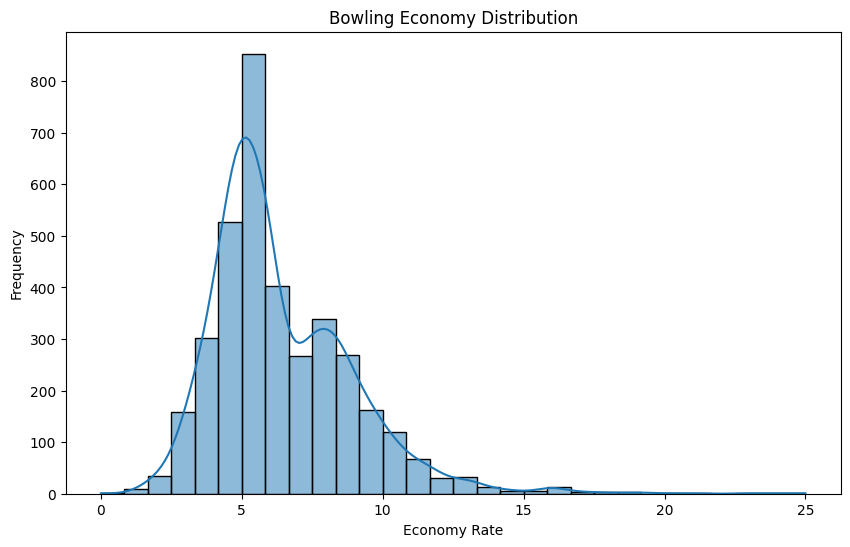

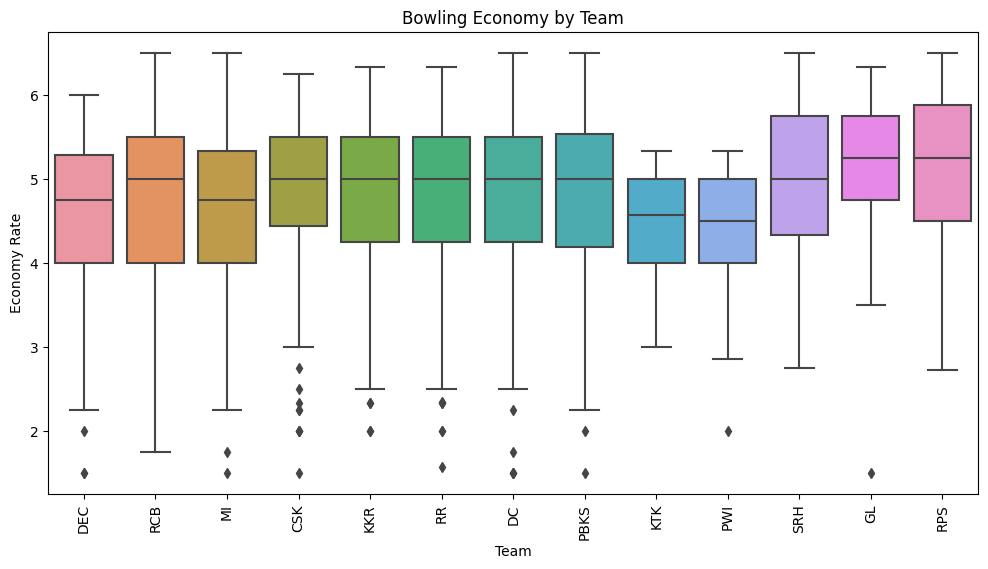

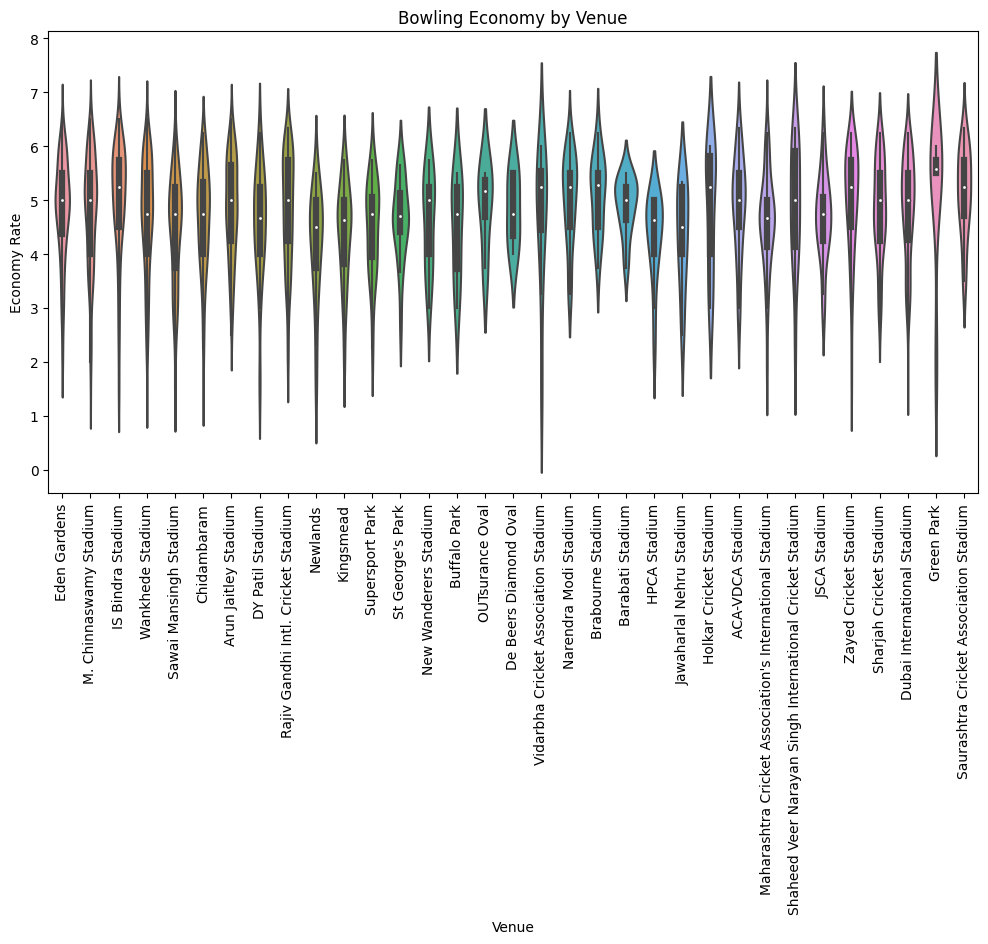

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Data Overview:")
print(combined_data.head())

print("Bowling Economy Statistics:")
print(combined_data['Econ'].describe()) #generate summary statistics for the 'Econ' column in the DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Econ'], bins=30, kde=True)
plt.title("Bowling Economy Distribution")
plt.xlabel("Economy Rate")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
# Creating a boxplot
# 'x' specifies the categorical variable on the x-axis (opponents)
# 'y' specifies the numerical variable on the y-axis (bowling economy)
# 'data' is the DataFrame containing the data
sns.boxplot(x='Against', y='Econ', data=combined_data)
plt.title("Bowling Economy by Team")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Economy Rate")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Venue', y='Econ', data=combined_data)
plt.title("Bowling Economy by Venue")
plt.xticks(rotation=90)
plt.xlabel("Venue")
plt.ylabel("Economy Rate")
plt.show()
